# 86_네이버 책 가격 회귀분석

In [2]:
import urllib.request

client_id = input()
client_secret = input()

In [ ]:
# # 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# # 네이버 검색 Open API 예제 - 블로그 검색
# import os
# import sys
# import urllib.request
# client_id = "YOUR_CLIENT_ID"
# client_secret = "YOUR_CLIENT_SECRET"
# encText = urllib.parse.quote("검색할 단어")
# url = "https://openapi.naver.com/v1/search/blog?query=" + encText # json 결과
# # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
# request = urllib.request.Request(url)
# request.add_header("X-Naver-Client-Id",client_id)
# request.add_header("X-Naver-Client-Secret",client_secret)
# response = urllib.request.urlopen(request)
# rescode = response.getcode()
# if(rescode==200):
#     response_body = response.read()
#     print(response_body.decode('utf-8'))
# else:
#     print("Error Code:" + rescode)

In [3]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = 'https://openapi.naver.com/v1/search'
    node = '/' + api_node + '.json'
    param_query = '?query=' + urllib.parse.quote(search_text)
    param_start = '&start=' + str(start_num)
    param_disp = '&display=' + str(disp_num)

    return base + node + param_query + param_start + param_disp

gen_search_url('book', '파이썬', 10, 3)

'https://openapi.naver.com/v1/search/book.json?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&start=10&display=3'

In [6]:
import json
import datetime

def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)

    response = urllib.request.urlopen(request)

    print("[%s] Url Request Success" % datetime.datetime.now())

    return json.loads(response.read().decode('utf-8'))

In [7]:
url = gen_search_url('book', '파이썬', 10, 3)
one_result = get_result_onpage(url)

[2022-05-30 01:27:12.681165] Url Request Success


In [8]:
one_result

{'lastBuildDate': 'Mon, 30 May 2022 01:27:12 +0900',
 'total': 1577,
 'start': 10,
 'display': 3,
 'items': [{'title': '한 권으로 끝내는 아두이노와 <b>파이썬</b>으로 52개 작품 만들기',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=22046408',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/220/464/22046408.jpg?type=m1&udate=20220301',
   'author': '장문철|박준원',
   'price': '22000',
   'discount': '19800',
   'publisher': '앤써북',
   'pubdate': '20220330',
   'isbn': '1185553940 9791185553948',
   'description': '이 책은 아두이노를 사용하여 하드웨어를 만들고 <b>파이썬</b>을 이용하여 PC에서 프로그램을 만든 후 서로 통신 및 융합하여 52가지 다양한 작품 만들기를 통해 재미와 학습 두 가지를 모두 할 수 있게 구성하였습니다!'},
  {'title': '백엔드를 위한 Django REST Framework with <b>파이썬</b>',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=22458464',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/224/584/22458464.jpg?type=m1&udate=20220514',
   'author': '권태형',
   'price': '18000',
   'discount': '16200',
   'publisher': '영진.com(영진닷컴)',
   'pubdate': '20220520',
   'i

In [9]:
# 제목에서 tag 제거하기
def delete_tag(input_str):
    input_str = input_str.replace('<b>', '')
    input_str = input_str.replace('</b>', '')
    
    return input_str

In [10]:
# 한 페이지의 내용을 pandas로
import pandas as pd

def get_fields(json_data):
    title = [delete_tag(each['title']) for each in json_data['items']]
    link = [each['link'] for each in json_data['items']]
    price = [each['price'] for each in json_data['items']]
    publisher = [each['publisher'] for each in json_data['items']]
    isbn = [each['isbn'].split()[0] for each in json_data['items']]

    result_pd = pd.DataFrame({'title':title, 'price':price, 'isbn':isbn,
                                'link':link, 'publisher':publisher},
                                columns=['title','price','publisher','isbn','link'])
    return result_pd

In [11]:
# test
url = gen_search_url('book','파이썬',10,3)
json_result = get_result_onpage(url)
pd_result = get_fields(json_result)
pd_result

[2022-05-30 01:32:40.585361] Url Request Success


,title,price,publisher,isbn,link
0,한 권으로 끝내는 아두이노와 파이썬으로 52개 작품 만들기,22000,앤써북,1185553940,http://book.naver.com/bookdb/book_detail.php?b...
1,백엔드를 위한 Django REST Framework with 파이썬,18000,영진.com(영진닷컴),8931466196,http://book.naver.com/bookdb/book_detail.php?b...
2,엑셀이 편해지는 파이썬 (엑셀 사용자를 위한 자동화 구축과 데이터 분석),28000,한빛미디어,1162245549,http://book.naver.com/bookdb/book_detail.php?b...


In [12]:
# api를 이용한 정보 수집 1000개
result_book = []

for n in range(1, 1000, 100):
    url = gen_search_url('book','파이썬',n, 100)
    json_result = get_result_onpage(url)
    pd_result = get_fields(json_result)

    result_book.append(pd_result)

result_book = pd.concat(result_book)

[2022-05-30 01:34:48.646277] Url Request Success
[2022-05-30 01:34:49.098698] Url Request Success
[2022-05-30 01:34:49.570283] Url Request Success
[2022-05-30 01:34:49.949898] Url Request Success
[2022-05-30 01:34:50.388646] Url Request Success
[2022-05-30 01:34:50.747319] Url Request Success
[2022-05-30 01:34:51.206119] Url Request Success
[2022-05-30 01:34:51.612862] Url Request Success
[2022-05-30 01:34:52.127658] Url Request Success
[2022-05-30 01:34:52.641322] Url Request Success


In [13]:
# 인덱스 정리
result_book.reset_index(drop=True, inplace=True)
                        # drop : Just reset the index, without inserting it as a column in the new DataFrame. // entries 가 0 ~ 99  반복되는 것을 피하기 위해 설정
                                    # inplace : Modify the Series in place (do not create a new object).
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1000 non-null   object
 1   price      1000 non-null   object
 2   publisher  1000 non-null   object
 3   isbn       1000 non-null   object
 4   link       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [14]:
# 가격의 데이터형 정리
result_book['price'] = result_book['price'].astype('float')
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   price      1000 non-null   float64
 2   publisher  1000 non-null   object 
 3   isbn       1000 non-null   object 
 4   link       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [15]:
# 한 페이지에 대해 일단 테스트
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = 'https://book.naver.com/bookdb/book_detail.nhn?bid=14922211'
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
                            # param features: Desirable features of the parser to be used. 
                            # This may be the name of a specific parser ("lxml", "lxml-xml", "html.parser", or "html5lib") or it may be the type of markup to be used ("html", "html5", "xml"). 
                            # It's recommended that you name a specific parser, so that Beautiful Soup gives you the same results across platforms and virtual environments.


soup

<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
책정보, 파이썬 라이브러리를 활용한 데이터 분석 : 네이버 책</title>
<meta content="article" property="og:type"/>
<meta content="파이썬 라이브러리를 활용한 데이터 분석" property="og:title"/>
<meta content="http://book.naver.com/bookdb/book_detail.naver?bid=14922211" property="og:url"/>
<meta content="https://bookthumb-phinf.pstatic.net/cover/149/222/14922211.jpg?type=m5" property="og:image"/>
<meta content="빅데이터 분석에 관한 가장 완벽한 교재! 

이 책은 NumPy, pandas, matplotlib, IPython, Jupyter 등 다양한 파이썬 라이브러리를 사용해서 효과적으로 데이터를 분석하는 방법을 알려준다. pandas의 새로운 기능뿐만 아니라 메모리 사용량을 줄이고 성능을 개선하는 고급 사용법까지 다룬다. 또한 모델링 도구인 statsmodels와 scikit-learn 라이브러리도 소개한다. 연대별 이름 통계 자료, 미 대선 데이터베이스 자료 등 실사례로 따라 하다 보면 어느덧 여러분도 데이터에 알맞게 접근하고 효과적으로 분석하는 전문가가 될 것이다." property="og:description"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버 책" property="og:article:author"/>
<me

In [19]:
soup.find_all(class_ = 'book_info')
                # _Strainable : class_  // 'book_info' 라는 class 클래스를 가져올건데, 입력할때는 class_ 로 입력해야한다. 로 이해하면 될듯

[<div class="book_info">
 <h2><a class="N=a:bil.title,i:98000001_000000000000000000E3B1E3" href="/bookdb/book_detail.naver?bid=14922211">파이썬 라이브러리를 활용한 데이터 분석 <span>영화 평점, 이름 통계, 선거 데이터 등 실사례 사용</span></a></h2>
 <div class="thumb type_end">
 <div class="thumb_type">
 <a class="N=a:bil.image,i:98000001_000000000000000000E3B1E3" href="javascript:showLayerBookImage();">
 <img alt="파이썬 라이브러리를 활용한 데이터 분석" onerror="emptyImg(this, 'm140')" src="https://bookthumb-phinf.pstatic.net/cover/149/222/14922211.jpg?type=m140&amp;udate=20220224"/>
 <span class="mask"><span class="bg1"></span><span class="bg2"></span></span>
 </a>
 </div>
 </div>
 <div class="book_info_inner">
 <div class="txt_desc">
 <a class="N=a:bil.point,i:98000001_000000000000000000E3B1E3" href="/bookdb/review.naver?bid=14922211" id="txt_desc_point">
 <div class="review_point2"><span style="width:0.0%;">별점</span></div>
 <strong>0.0<span class="blind">점</span></strong> <span class="bar">|</span> 네티즌리뷰 <strong> 2</strong><span class=

In [32]:
tmp = soup.find_all(class_ = 'book_info')[0].get_text()
                                            # text 만 가져오기.
tmp

'\n파이썬 라이브러리를 활용한 데이터 분석\xa0영화 평점, 이름 통계, 선거 데이터 등 실사례 사용\n\n\n\n\n\n\n\n\n\n\n\n별점\n0.0점 | 네티즌리뷰  2건\n\n\n저자 웨스 맥키니|역자 김영근|한빛미디어\n|2019.05.20\n원제 Python for data analysis\n페이지 664|ISBN  9791162241905|판형 규격외 변형\n\n\n도서\n31500원\n35000원\n-10%\n\n\nebook 28000 | 25200\n25200원\n28000원\n-10%\n\n\n\n\n\n가격정보\n\n\n\n\n\n\n\n\n\n\nISBN이란?\n국제표준도서번호(International Standard Book Number)로서, 국제적으로 표준화된방법에 따라 전세계에서 생산되는 도서에부여된 고유번호를 말합니다.\n\n\n\n'

In [27]:
# Regular Expression
import re
 
tmp = soup.find_all(class_ = 'book_info')[0].get_text()
                    # _Strainable : html 의 객체 이름을 넣는다. class 객체는 class_로 입력하고, 어떤 이름의 class_를 가져오는지 입력하면 된다.
                    # class_ = 'book_info'

result = re.search('페이지\s+\d+', tmp)     # 페이지 664 를 찾기 위해 re 사용
                        # \s+\d+ : 공백들과 decimal들로 이루어진 것

result.group()

'페이지 664'

In [33]:
# 페이지 정보 얻기
import re
import numpy as np

def get_page_num(soup):
    tmp = soup.find_all(class_ = 'book_info')[0].get_text()

    try :
        result = re.search('페이지\s+\d+', tmp).group()
        return result.split()[1]

    except:
        print('==> Error in get_page_num!!')
        return np.nan

get_page_num(soup)

'664'

In [34]:
# 반복 작업
import time

page_num_col = []

for url in result_book['link']:
    print(url)
    print(time.time())

    try :
        page_num = get_page_num(BeautifulSoup(urlopen(url), 'html.parser'))
        page_num_col.append(page_num)

    except:
        print('===> Error in urlopen!!')
        page_num_col.append(np.nan)

    print(len(page_num_col))
    time.sleep(0.5)

result_book['page_num'] = page_num_col

http://book.naver.com/bookdb/book_detail.php?bid=21982844
1653843869.441503
1
http://book.naver.com/bookdb/book_detail.php?bid=22449999
1653843870.308446
2
http://book.naver.com/bookdb/book_detail.php?bid=15052904
1653843871.1799061
3
http://book.naver.com/bookdb/book_detail.php?bid=16439154
1653843872.0379179
4
http://book.naver.com/bookdb/book_detail.php?bid=22425526
1653843872.925548
5
http://book.naver.com/bookdb/book_detail.php?bid=16406247
1653843873.811272
6
http://book.naver.com/bookdb/book_detail.php?bid=22478805
1653843874.6917388
7
http://book.naver.com/bookdb/book_detail.php?bid=14126163
1653843875.542474
8
http://book.naver.com/bookdb/book_detail.php?bid=22346673
1653843876.3989482
9
http://book.naver.com/bookdb/book_detail.php?bid=22046408
1653843877.282461
10
http://book.naver.com/bookdb/book_detail.php?bid=22458464
1653843878.193672
11
http://book.naver.com/bookdb/book_detail.php?bid=22335824
1653843879.053622
12
http://book.naver.com/bookdb/book_detail.php?bid=14820571

In [36]:
len(page_num_col)

1000

In [37]:
page_num_col

['348',
 '480',
 '360',
 '604',
 '368',
 '724',
 '72',
 '200',
 '724',
 '432',
 '248',
 '388',
 '308',
 '420',
 '244',
 '504',
 '524',
 '336',
 '868',
 '576',
 '460',
 '364',
 '268',
 '640',
 '380',
 '640',
 '296',
 '340',
 '424',
 '380',
 '624',
 '727',
 '544',
 '200',
 '468',
 '366',
 '352',
 '300',
 '796',
 '448',
 '756',
 '280',
 '312',
 '400',
 '540',
 '381',
 '592',
 '440',
 '432',
 '664',
 '316',
 '320',
 '248',
 '310',
 '356',
 '588',
 '776',
 '608',
 '680',
 '376',
 '480',
 '360',
 '576',
 '183',
 '516',
 '448',
 '428',
 '448',
 '480',
 '376',
 '432',
 '528',
 '500',
 '744',
 '460',
 '452',
 '236',
 '348',
 '292',
 '376',
 '276',
 '536',
 '248',
 '600',
 '536',
 '872',
 '444',
 '292',
 '300',
 '388',
 '234',
 '336',
 '384',
 '288',
 '420',
 nan,
 '280',
 '488',
 '470',
 '200',
 '364',
 '390',
 '380',
 '644',
 '520',
 '320',
 '476',
 '264',
 '268',
 '680',
 '368',
 '252',
 '348',
 '388',
 '508',
 '328',
 '376',
 '54',
 '264',
 '444',
 '401',
 '660',
 '466',
 '488',
 '344',
 '22

In [38]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   price      1000 non-null   float64
 2   publisher  1000 non-null   object 
 3   isbn       1000 non-null   object 
 4   link       1000 non-null   object 
 5   page_num   966 non-null    object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [39]:
result_book['page_num'] = result_book['page_num'].astype('float')
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   price      1000 non-null   float64
 2   publisher  1000 non-null   object 
 3   isbn       1000 non-null   object 
 4   link       1000 non-null   object 
 5   page_num   966 non-null    float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [40]:
# 놓친 데이터 다시 시도하기
for idx, row in result_book.iterrows():
    if np.isnan(row['page_num']):
        print('Start fix ...')
        print(row['link'])
        page_num = get_page_num(BeautifulSoup(urlopen(row['link']),
                                'html.parser'))
        result_book.loc[idx, 'page_num'] = page_num
        time.sleep(0.5)

Start fix ...
http://book.naver.com/bookdb/book_detail.php?bid=22465465
==> Error in get_page_num!!
Start fix ...
http://book.naver.com/bookdb/book_detail.php?bid=16428366
==> Error in get_page_num!!
Start fix ...
http://book.naver.com/bookdb/book_detail.php?bid=18524179
==> Error in get_page_num!!
Start fix ...
http://book.naver.com/bookdb/book_detail.php?bid=14451255
==> Error in get_page_num!!
Start fix ...
http://book.naver.com/bookdb/book_detail.php?bid=17762512
==> Error in get_page_num!!
Start fix ...
http://book.naver.com/bookdb/book_detail.php?bid=17553866
==> Error in get_page_num!!
Start fix ...
http://book.naver.com/bookdb/book_detail.php?bid=16897193
==> Error in get_page_num!!
Start fix ...
http://book.naver.com/bookdb/book_detail.php?bid=16592390
==> Error in get_page_num!!
Start fix ...
http://book.naver.com/bookdb/book_detail.php?bid=15768118
==> Error in get_page_num!!
Start fix ...
http://book.naver.com/bookdb/book_detail.php?bid=16293317
==> Error in get_page_num!!


In [41]:
result_book['page_num'] = result_book['page_num'].astype('float')
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   price      1000 non-null   float64
 2   publisher  1000 non-null   object 
 3   isbn       1000 non-null   object 
 4   link       1000 non-null   object 
 5   page_num   966 non-null    float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [42]:
# 없는 데이터는 버리기
result_book = result_book[result_book['page_num'].notnull()]
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      966 non-null    object 
 1   price      966 non-null    float64
 2   publisher  966 non-null    object 
 3   isbn       966 non-null    object 
 4   link       966 non-null    object 
 5   page_num   966 non-null    float64
dtypes: float64(2), object(4)
memory usage: 52.8+ KB


In [44]:
# 엑셀로 정리하기
writer = pd.ExcelWriter('./python_books.xlsx', engine='xlsxwriter')
result_book.to_excel(writer, sheet_name = 'Sheet1')

workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.set_column('A:A', 5)
worksheet.set_column('B:B', 60)
worksheet.set_column('C:C', 10)
worksheet.set_column('D:D', 15)
worksheet.set_column('E:E', 10)
worksheet.set_column('F:F', 50)

writer.save()

# 회귀분석 진행

In [45]:
raw_data = pd.read_excel('./python_books.xlsx', index_col=0)
raw_data.head()

,title,price,publisher,isbn,link,page_num
0,"만들면서 배우는 파이썬과 40개의 작품들 (자동화, 크롤링, 이미지처리, 데이터분석...",18800,앤써북,1185553932,http://book.naver.com/bookdb/book_detail.php?b...,348
1,점프 투 파이썬: 라이브러리 예제 편(Do it!) (실무에 쓰는 라이브러리는 이 ...,26000,이지스퍼블리싱,1163033553,http://book.naver.com/bookdb/book_detail.php?b...,480
2,Do it! 점프 투 파이썬,18800,이지스퍼블리싱,1163030910,http://book.naver.com/bookdb/book_detail.php?b...,360
3,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,34000,한빛미디어,1162243074,http://book.naver.com/bookdb/book_detail.php?b...,604
4,"일잘러의 비밀, 엑셀 대신 파이썬으로 업무 자동화하기 (엑셀 반복 업무로 지친 직장...",24000,한빛미디어,1162245565,http://book.naver.com/bookdb/book_detail.php?b...,368


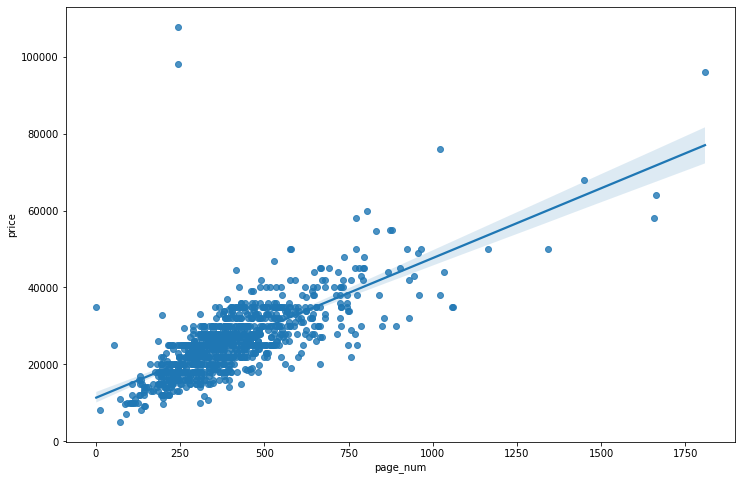

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y = 'price', data=raw_data,)
plt.show()

## 페이지와 가격은 회귀적 관계가 있다 

In [52]:
raw_data[raw_data['price']>100000]

,title,price,publisher,isbn,link,page_num
289,"한권으로 파이썬과 드론 날로먹기 (파이썬의 기초문법, 응용 예제가 한권에,인공지능편)",107800,잇플,1191198189,http://book.naver.com/bookdb/book_detail.php?b...,245


In [54]:
raw_data['publisher'].value_counts()

에이콘출판          120
한빛미디어           96
위키북스            62
길벗              47
제이펍             40
              ... 
프리렉(이한디지털리)      1
슈퍼트랙             1
한성대학교출판부         1
에피스테메            1
이엔지미디어           1
Name: publisher, Length: 195, dtype: int64

In [55]:
len(raw_data['publisher'].unique())

195

In [56]:
# 한글 대응
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

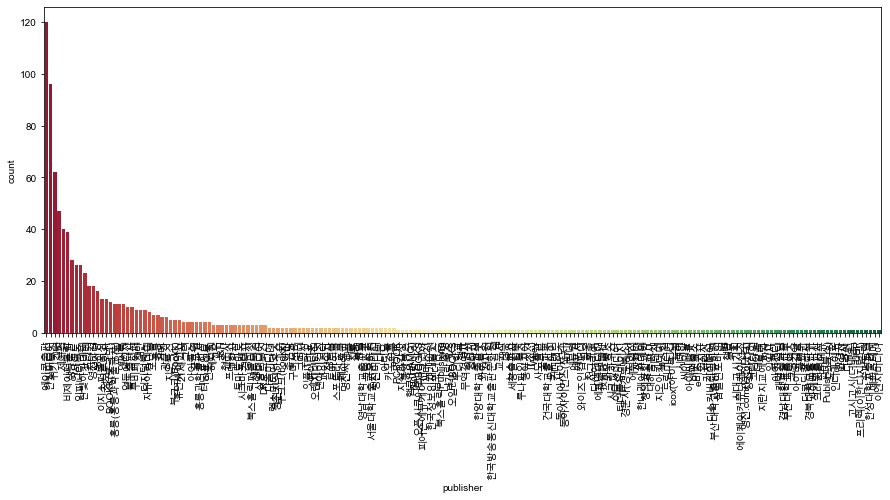

In [63]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'publisher', data=raw_data, palette='RdYlGn',
                order = raw_data['publisher'].value_counts().index)
                # FutureWarning: Pass the following variable as a keyword arg: x  
                # x축의 데이터를 x= 'data column' 으로 나타내라는 경고
plt.xticks(rotation=90)
plt.show()

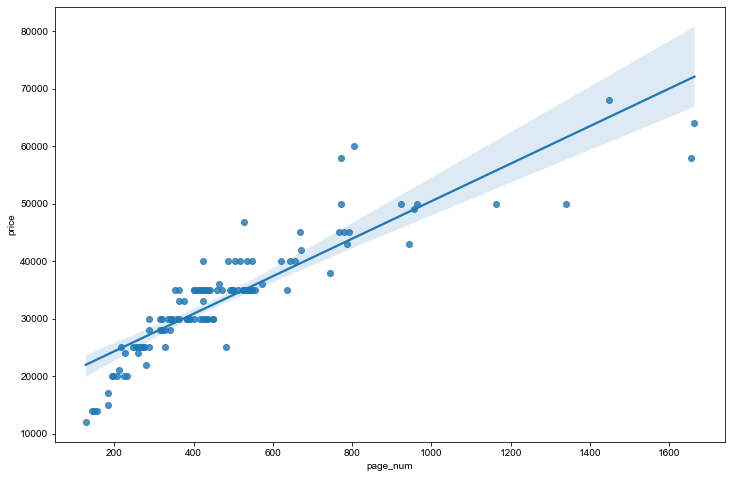

In [64]:
raw_1 = raw_data[raw_data['publisher'] == '에이콘출판']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_1)
plt.show()

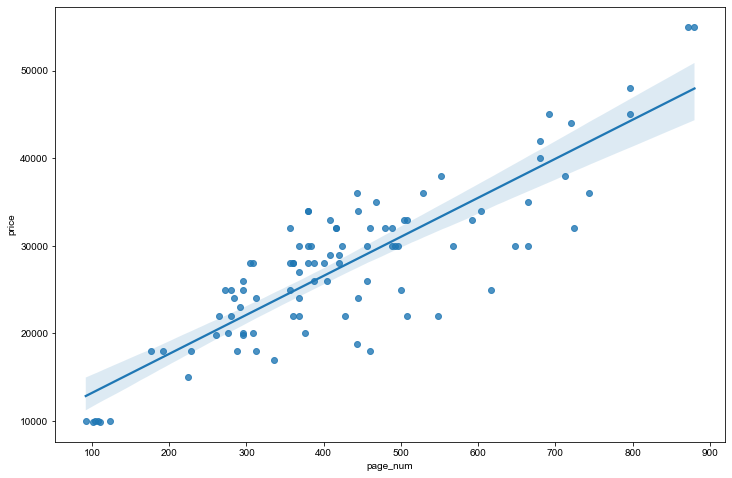

In [65]:
raw_2 = raw_data[raw_data['publisher']=='한빛미디어']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_2)
plt.show()

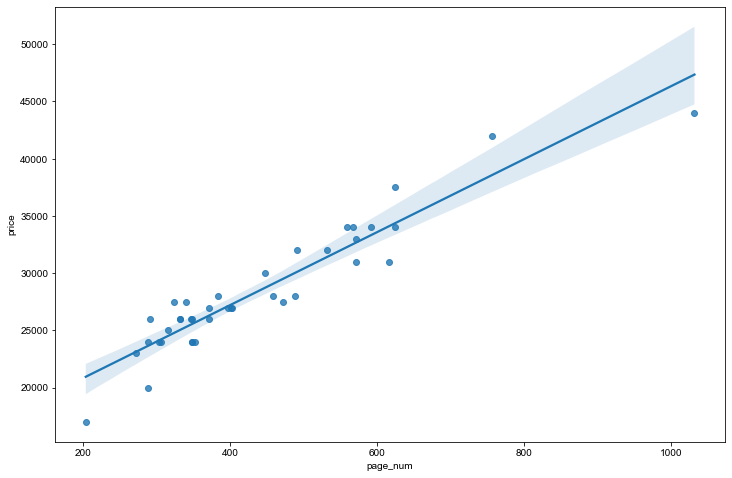

In [66]:
raw_3 = raw_data[raw_data['publisher']=='비제이퍼블릭']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_3)
plt.show()

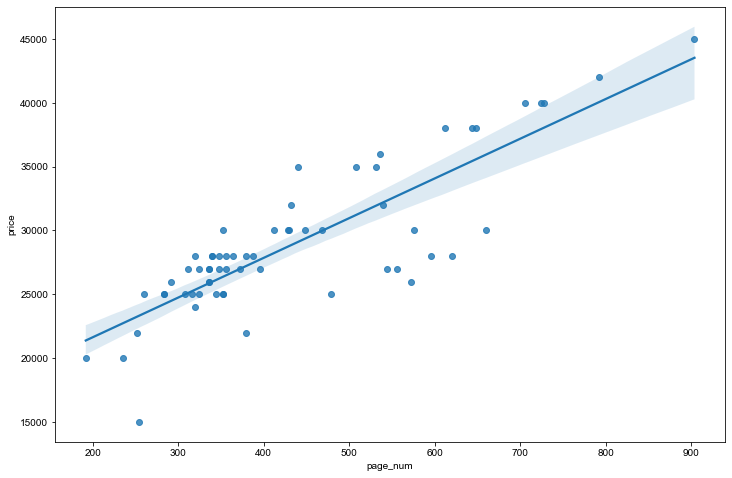

In [67]:
raw_4 = raw_data[raw_data['publisher']=='위키북스']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_4)
plt.show()

In [68]:
# box
import plotly.express as px

px.box(raw_data, y='price')

In [69]:
# 회귀 모델 구성을 위한 데이터 나누기
from sklearn.model_selection import train_test_split

X = raw_data['page_num'].values
y = raw_data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1 )


In [70]:
# 선형회귀 학습
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [71]:
# 에러계산
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr,'원')
print('RMSE of Test Data : ', rmse_test,'원')

RMSE of Train Data :  5257.142199021731
RMSE of Test Data :  9912.93700602593


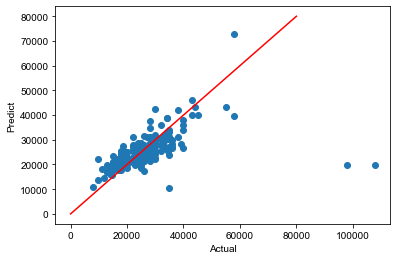

In [72]:
# 참값과 예측값
plt.scatter(y_test, pred_test)
            # X 축을 참값
                    # Y축을 예측값
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.plot([0, 80000], [0, 80000], 'r')
plt.show()

In [73]:
# 이번엔 특정 출판사 것만
X = raw_1['page_num'].values
y = raw_1['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1,1)

In [74]:
reg.fit(X_train,y_train)

LinearRegression()

In [75]:
# 에러계산
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr,'원')
print('RMSE of Test Data : ', rmse_test,'원')

RMSE of Train Data :  4668.107630437563 원
RMSE of Test Data :  3715.2079652196053 원


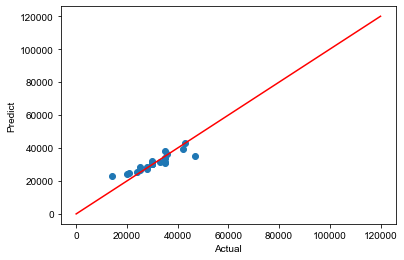

In [76]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.plot([0, 120000],[0,120000], 'r')
plt.show()

## 분야별로는 점검하지 못했지만, 출판사별로는 의미가 있음

## 결론 : 네이버 책 가격을 `DataFrame`으로 가져오고, plt을 통해 `회귀 관계를 확인`하였고, MSE를 확인하며 `과소, 과대적합을 확인`하였고, Linear Regression을 통해 `선형회귀관계를 확인`하였고, 
## `전체 데이터의 참값과 예측값`을 plt를 통해 확인하였고, `출판사별 페이지수와 가격을 재 확인`하였다.

## 그 결과 `출판사별 페이지수와 가격의 선형회귀관계가 더 명확(?) 하다는 것`을 확인할 수 있게 되었다.
# ...?